## Задания к уроку 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
get_next = True

while get_next:
    print(np.random.randint(0, 38))
    get_next = input('Continue? (y/n)') == 'y'

27
Continue? (y/n)y
21
Continue? (y/n)y
16
Continue? (y/n)y
32
Continue? (y/n)y
12
Continue? (y/n)n


### 2. 
1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Условие: Пусть в группе учится 29 человек. Определите, какова вероятность того, что большинство студентов мужского или женского пола.
- P(A + B + C) = P(A) + P(B) + P(C) (Теорема о сложении вероятностей несовместных событий)
- P(A + B + C) = 1
- P(A) - вероятность того, что большинство учащихся мужского пола
- P(B) - вероятность того, что большинство учащихся женского пола
- P(C) - вероятность того, что в группе поровну мальчиков и девочек)

In [3]:
k = 1000
total = 29

p_abc = []

while k > 0:    
    students = np.random.choice(['m', 'w'], total)
    
    m = np.sum(students == 'm')
    w = total - m
    
    p_abc.append((m > w) + (w > m) + (m == w))
   
    k = k - 1

In [4]:
print(np.all(np.array(p_abc) == True))

True


2. Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [5]:
from numpy.random import randint as randint
from numpy.random import choice as choice

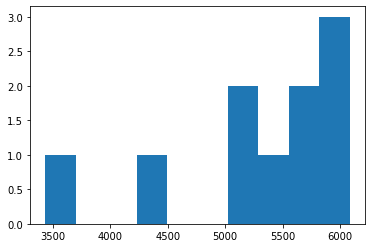

In [6]:
size = 10
low = 0
high = 1000

sums = [choice(range(low, high), size, replace=False).sum() 
        for _ in range(size)] 

plt.hist(sums, 10);

### 3.
1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.
2. Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [7]:
from math import factorial

In [8]:
k, n, t = 0, 10, 4 # t % 2 == 0

# Немного переделал пример из видеоурока,
# чтобы было интереснее
for _ in range(n):
    bits_by_index = np.random.randint(0, 2, t)
    if bits_by_index.sum() == t / 2:
        k = k + 1
 
p_teor = k / n * 100

c = factorial(n) / (factorial(k) * factorial(n - k))
p_empir = c / 2**n * 100

print(f'''
Количество испытаний - {n}
Количество успешных испытаний - {k}
Вероятность успеха (практическая) - {p_teor:.0f} % 
Вероятность успеха (теоретическая) - {p_empir:.0f} % 
''')


Количество испытаний - 10
Количество успешных испытаний - 3
Вероятность успеха (практическая) - 30 % 
Вероятность успеха (теоретическая) - 12 % 



### 4. 
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [9]:
from itertools import permutations, product, combinations

In [10]:
def calc_param(arr, k, is_print, func, param_name):
    count = 0
    
    sets = list(func(arr, k))
    length = len(sets)
    
    print(f'Количество {param_name} - {length}')
       
    if is_print:
        for p in sets:        
            print(''.join(str(el) for el in p))

In [11]:
arr = '0123'
n, k = 4, 3

print(f'Для последовательность [{",".join(arr)}] и длины подпоследовательность k={k}')

calc_param(arr, n, False, permutations, 'перестановок')
calc_param(arr, k, False, permutations, 'размещений')
calc_param(arr, k, False, lambda arr, k: product(arr, repeat=k), 'сочетаний с повторами')
calc_param(arr, k, False, combinations, 'сочетаний без повторов')

Для последовательность [0,1,2,3] и длины подпоследовательность k=3
Количество перестановок - 24
Количество размещений - 24
Количество сочетаний с повторами - 64
Количество сочетаний без повторов - 4


### 5. 
Дополните код расчетом коэффициента корреляции x и y

0.7022645183826188 0.1512106085248098
0.7022645183826182 0.15121060852481016
Коэффициент корреляции (library) - 0.9167273761819007
0.24650185767335983
0.4304972435600516
Коэффициент корреляции (custom) - 120.0


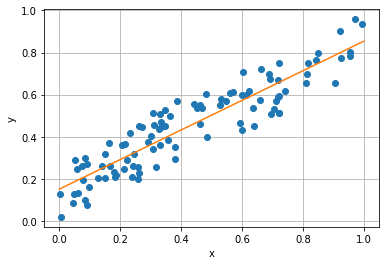

In [12]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r * x + (1 - r) * np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x) * np.sum(y) - n * np.sum(x * y)) / (np.sum(x) * np.sum(x) - n * np.sum(x * x))
b = (np.sum(y) - a * np.sum(x)) / n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
print(f'Коэффициент корреляции (library) - {np.corrcoef(x, y)[0, 1]}')

print(np.average(x * y))
print(np.average(x))
 
xy = np.average(x * y)
x = np.average(x)
y = np.average(y)
    
# c = (np.sum(x * y) - np.sum(x) * np.sum(y)) / (np.sqrt(np.sum(x**2) - x**(-2)))
print(f'Коэффициент корреляции (custom) - {c}')

plt.plot([0, 1], [b, a + b])
plt.show()